In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import type_of_target
from utils.real_datasets import load_dataset
import matplotlib.pyplot as plt

from explainer.HSICExplainer import HSICExplainer

In [5]:
# Select a dataset to demonstrate HSICExplainer and SHAP plotting
dataset_name = "breast_cancer_wisconsin"  # Example dataset, can be changed to any other dataset
print(f"\nProcessing dataset: {dataset_name}")

# Load dataset
X, y = load_dataset(dataset_name)
mode = "classification" if type_of_target(y) in ["binary", "multiclass"] else "regression"
print(f"dataset size: {X.shape}")

if mode != "regression":
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y).reshape(-1, 1)



Processing dataset: breast_cancer_wisconsin
dataset size: (569, 30)


/Users/majidmohammadi/surfdrive/Research/Explainable AI/RKHS-ExactSHAP/_venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


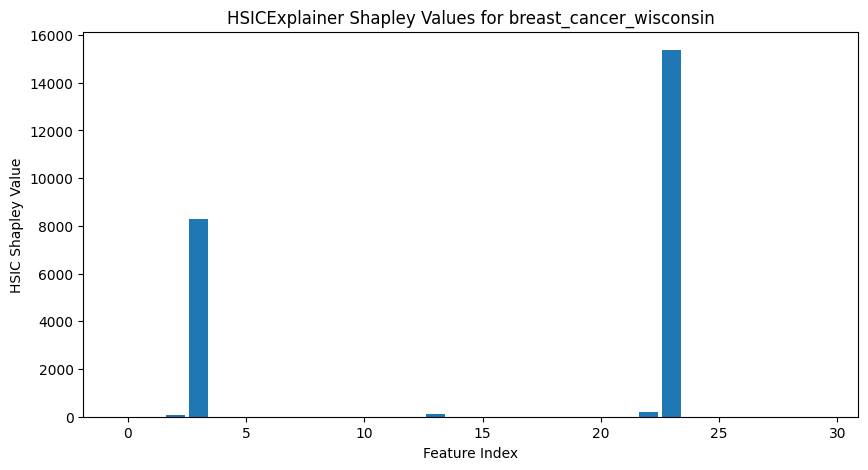

In [6]:
# Feature selection with HSICExplainer
hsicx = HSICExplainer(X, y)
hsic_sv = hsicx.explain()  # Shapley values from HSICExplainer

# Plot the Shapley values
plt.figure(figsize=(10, 5))
plt.bar(range(len(hsic_sv)), hsic_sv)
plt.xlabel("Feature Index")
plt.ylabel("HSIC Shapley Value")
plt.title(f"HSICExplainer Shapley Values for {dataset_name}")
plt.show()

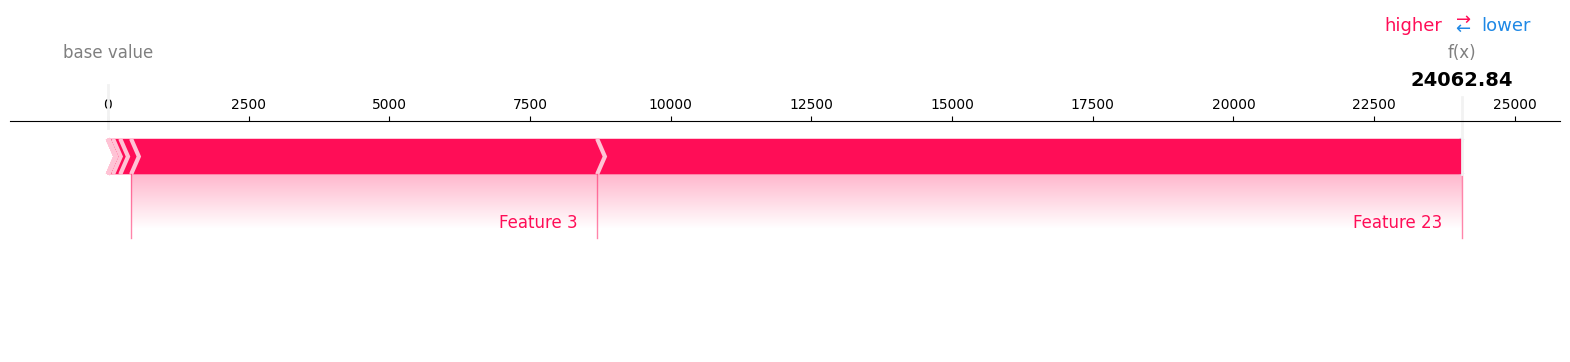

In [3]:
import shap 
shap.initjs()
shap_values = hsic_sv
base_value = 0
shap.force_plot(base_value, shap_values, matplotlib=True)